## IT plače ##

Zakaj ne bi zbranih podatkov pokazali še nekoliko bolj drugače. Zdi se, da bi poleg klasičnega frekvenčnega pregleda lahko na hitro pregledali še relacije med spremenljivkami in ugotavljali, kaj se dogaja s plačami v IT industriji.

Notebook je narejen z uporabo distribucije Anaconda 3 in Python 3. Kakršnekoli pripombe in komentarji so dobrodošli.

In [11]:
# Najprej import knjižnic

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import scipy
import warnings
from textwrap import wrap

from sklearn import linear_model

%matplotlib inline
plt.rcParams['axes.facecolor']='white'
sns.set(context="notebook", font_scale=1.2)
warnings.filterwarnings('ignore')

In [12]:
# Direkten import podatkov

IT_data = pd.read_csv('https://docs.google.com/spreadsheets/export?' + 
                      'id=1BebSshpZEm8plw0cge_pJMb18d52JW4kWC0e_sffAyk' +
                      '&exportFormat=csv', 
                      header=1, names=['Date', 'Employer', 'Origin', 'Arrangement', 'Pay', 'Duration'])

Ok, podatki so naloženi, najbolje da pogledamo vsako spremenljivko posebej.

Total N = 889


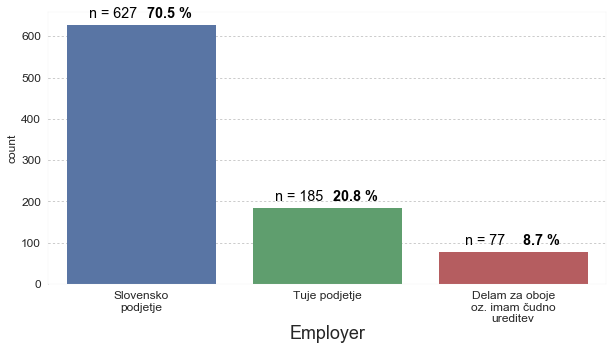

In [13]:
'''
Začnimo s klasičnim frekvenčnim prikazom zaposlovalca anketirancev.
'''

zaposlovalec=['Slovensko podjetje', 'Tuje podjetje', 'Delam za oboje oz. imam čudno ureditev']

sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

plt.figure(figsize=(10,5))

plt.grid(b=True, which='major', linestyle=':')
ncount = len(IT_data[IT_data['Employer'].isnull() == False])
ax = sns.countplot(x="Employer", data=IT_data, order=['Slovensko podjetje','Tuje podjetje','Delam za oboje oz. imam čudno ureditev'])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f} %'.format(100.*y/ncount), (x.mean()+0.15, y+10), ha='center', va='bottom', color='black', weight='bold')
    ax.annotate('n = {:.0f}'.format(y), (x.mean()-0.15, y+10), ha='center', va='bottom', color='black')

zaposlovalec1 = [ '\n'.join(wrap(l, 15)) for l in zaposlovalec ]

ax.set_xticklabels(zaposlovalec1, fontsize=12)
ax.set_xlabel('Employer', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('count', fontsize=12)
    
print("Total N =", IT_data['Employer'].value_counts().sum())

Največ anketirancev dela za Slovensko podjetje (70.5 %), ena petina anketirancev pa dela za tuje podjetje (20.8 %). Najmanjši delež anketirancev pa pravi da dela za oboje oz. ima neko čudno (oz. drugačno) ureditev (8.7 %). Poglejmo kakšno plačo imajo anketiranci glede na to za katero podjetje delajo.

In [14]:
'''
Zaradi prikaza v boxplotu moramo transformirati kategorije v numerična števila, v gafu sicer kategorije potem nadomestim z 
labelami, da vemo za kateri plačni razred gre.
'''

IT_data['Pay_F'] = IT_data['Pay'].apply(lambda x: {'< 700 EUR' : 0, '700 - 900 EUR' : 1, '900 - 1100 EUR' : 2, 
                                                   '1100 - 1300 EUR' : 3, '1300 - 1600 EUR' : 4, '1600 - 2000 EUR' : 5, 
                                                   '2000 - 2500 EUR' : 6, '2500 - 3000 EUR' : 7, '3000 - 3500 EUR' : 8, 
                                                   '3500 - 4500 EUR' : 9, '4500 - 5500 EUR' : 10, '5500 - 7000 EUR' : 11,
                                                   '7000 - 9000 EUR' : 12, '9000 - 12000 EUR' : 13, '> 12000 EUR' : 14}[x])

znesek=['< 700 €', '700 - 900 €', '900 - 1100 €', '1100 - 1300 €', '1300 - 1600 €', '1600 - 2000 €', '2000 - 2500 €', 
        '2500 - 3000 €', '3000 - 3500 €', '3500 - 4500 €', '4500 - 5500 €', '5500 - 7000 €', '7000 - 9000 €', 
        '9000 - 12000 €', '> 12000 €']

Total N = 889


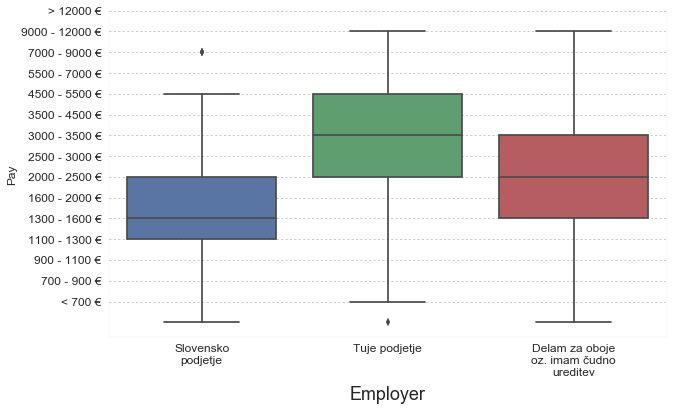

In [15]:
'''
Glavna opazovana spremenljivka v celi anketi je definitivno višina plače. Kakšno plačo imajo anketiranci glede na zaposlovalca.
Ali drugače, kdo najbolje plačuje v IT panogi?
'''

sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

plt.figure(figsize=(10,6))

plt.grid(b=True, which='major', linestyle=':')

ax = sns.boxplot(x="Employer", y="Pay_F", data=IT_data, order=zaposlovalec)

ax.set_yticks(np.arange(1,16))
ax.set_yticklabels(znesek)

zaposlovalec1 = [ '\n'.join(wrap(l, 15)) for l in zaposlovalec ]

ax.set_xticklabels(zaposlovalec1, fontsize=12)
ax.set_xlabel('Employer', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('Pay', fontsize=12)
    
print("Total N =", IT_data['Employer'].value_counts().sum())

Glede na to, da so vse spremenljivke kategorične, je smiselen prikaz boxplot-a (boxplot je razdeljen na 4 kvartile, torej 'škatla' predstavlja 50 % vseh anketirancev; 50 % preostalih pa so porazdeljeni v zgornji oz. spodnji kvartil).

Anketiranci, ki delajo za slovenska podjetja imajo nekoliko nižje plače kot anketiranci, ki delajo za tuja podjetja (torej range 3. kvartila anketirancev, ki dela za slovenska podjetja je med 1.300 € - 2.500 €, medtem ko je range prav tako 3. kvartila anketirancev, ki delajo za tuje podjetje med 3.000 € - 5.500 €). 

Mediana se zdi dober pokazatelj srednje vrednosti in prav tako lepo pokaže razliko med vsemi tremi različnimi tipi delodajalcev.

In [16]:
'''
Zaradi preprostosti sem vse skupaj kar kaže na delo v tujini, združil. Anketirancev, ki delajo v tujini je precej malo, zato je
smiselno vse skupaj gledati kot eno skupino. Ne moremo trditi, da je vzorec ravno absolutno reprezentativen glede na IT
industrijo v Sloveniji, ampak glede na priljubljenost Slo-tech foruma in dovolj veliko število anket je vsekakor tudi povsem
preprosta analiza zbranih podatkov lahko precej zanimiva.
'''

# Recode podatkov - Origin

IT_data.loc[IT_data['Origin'] == 'Živim v Sloveniji', 'Origin_r'] = 'Živim v Sloveniji'
IT_data.loc[IT_data['Origin'] == 'Živim v drugi državi EU', 'Origin_r'] = 'Živim v drugi državi / nomad'
IT_data.loc[IT_data['Origin'] == 'Živim v drugi državi', 'Origin_r'] = 'Živim v drugi državi / nomad'
IT_data.loc[IT_data['Origin'] == 'Živim v ZDA', 'Origin_r'] = 'Živim v drugi državi / nomad'
IT_data.loc[IT_data['Origin'] == 'Stalno prebivališče se pogosto spreminja, v skladu s potrebami in zmožnostmi - davčni rezident sem v Sloveniji.', 'Origin_r'] = 'Živim v drugi državi / nomad'
IT_data.loc[IT_data['Origin'] == 'Nomad', 'Origin_r'] = 'Živim v drugi državi / nomad'

legenda = ['Živim v Sloveniji','Živim v drugi državi / nomad']

Total N = 889


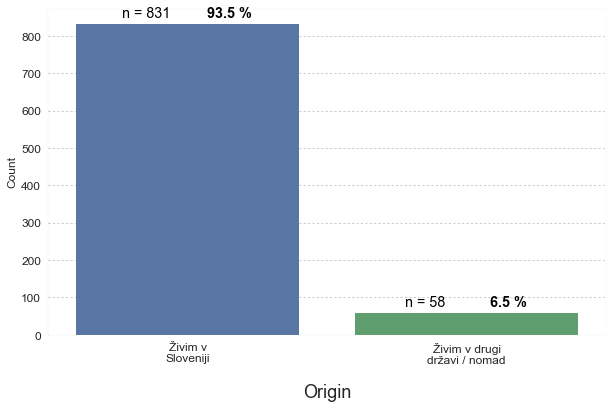

In [17]:
plt.figure(figsize=(10,6))

sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

plt.grid(b=True, which='major', linestyle=':')
ncount = len(IT_data[IT_data['Origin_r'].isnull() == False])
ax = sns.countplot(x="Origin_r", data=IT_data, order=legenda)

legenda = ['\n'.join(wrap(l, 15)) for l in legenda]

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f} %'.format(100.*y/ncount), (x.mean()+0.15, y+10), ha='center', va='bottom', color='black', weight='bold')
    ax.annotate('n = {:.0f}'.format(y), (x.mean()-0.15, y+10), ha='center', va='bottom', color='black')

ax.set_xticklabels(legenda, fontsize=12)
ax.set_xlabel('Origin', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('Count', fontsize=12)
    
print("Total N =", IT_data['Origin_r'].value_counts().sum())

Total N = 889


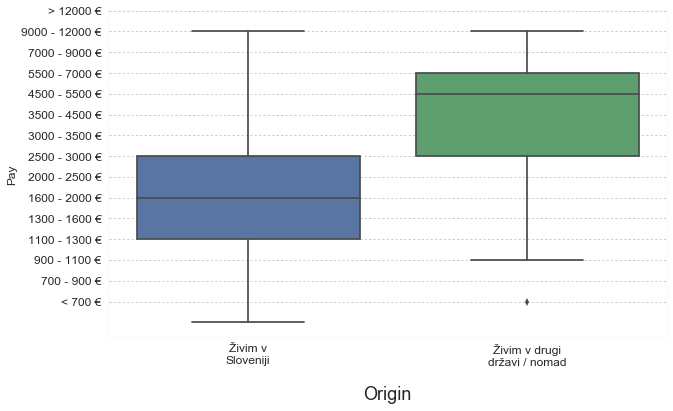

In [18]:
sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

plt.figure(figsize=(10,6))

plt.grid(b=True, which='major', linestyle=':')

ax = sns.boxplot(x="Origin_r", y="Pay_F", data=IT_data)

ax.set_yticks(np.arange(1,16))
ax.set_yticklabels(znesek)

legenda1 = [ '\n'.join(wrap(l, 15)) for l in legenda ]

ax.set_xticklabels(legenda, fontsize=12)
ax.set_xlabel('Origin', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('Pay', fontsize=12)
    
print("Total N =", IT_data['Origin_r'].value_counts().sum())

In [19]:
'''
Ok, kaj pa status anketirancev, kako pa le ta funkcionira v anketi. Podobno kot prej, je zaradi preprostosti bolje rekodirati
podatke skupaj.
'''

# Recode podatkov v 4 kategorije

IT_data.loc[IT_data['Arrangement'] == 'Zaposlen', 'Arrangement_r'] = 'Zaposlen'
IT_data.loc[IT_data['Arrangement'] == 'Podjetje / s.p.', 'Arrangement_r'] = 'Podjetje / s.p.'
IT_data.loc[IT_data['Arrangement'] == 'Študent', 'Arrangement_r'] = 'Študent'
IT_data.loc[IT_data['Arrangement'] == 'Zaposlen in S.P', 'Arrangement_r'] = 'Podjetje / s.p.'
IT_data.loc[IT_data['Arrangement'] == 'Avtorske in podjemne pogodbe', 'Arrangement_r'] = 'Drugo'
IT_data.loc[IT_data['Arrangement'] == 'zaposlen in popoldanski s.p.', 'Arrangement_r'] = 'Podjetje / s.p.'
IT_data.loc[IT_data['Arrangement'] == 'zaposlen + s.p.', 'Arrangement_r'] = 'Podjetje / s.p.'
IT_data.loc[IT_data['Arrangement'] == 'Več podjetij in s.p.', 'Arrangement_r'] = 'Podjetje / s.p.'

dogovor = ['Zaposlen', 'Podjetje / s.p.']

Total N = 879


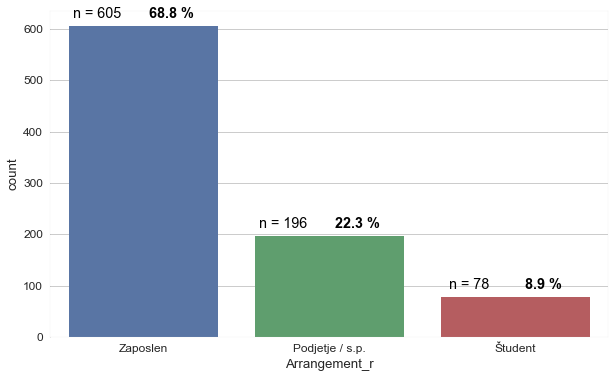

In [20]:
plt.figure(figsize=(10,6))

sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

ncount = len(IT_data[IT_data['Arrangement_r'].isnull() == False])
ax = sns.countplot(x="Arrangement_r", data=IT_data, order=['Zaposlen','Podjetje / s.p.','Študent'])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f} %'.format(100.*y/ncount), (x.mean()+0.15, y+10), ha='center', va='bottom', color='black', weight='bold')
    ax.annotate('n = {:.0f}'.format(y), (x.mean()-0.25, y+10), ha='center', va='bottom', color='black')
    
print("Total N =", IT_data['Arrangement_r'].value_counts().sum())

Total N = 879


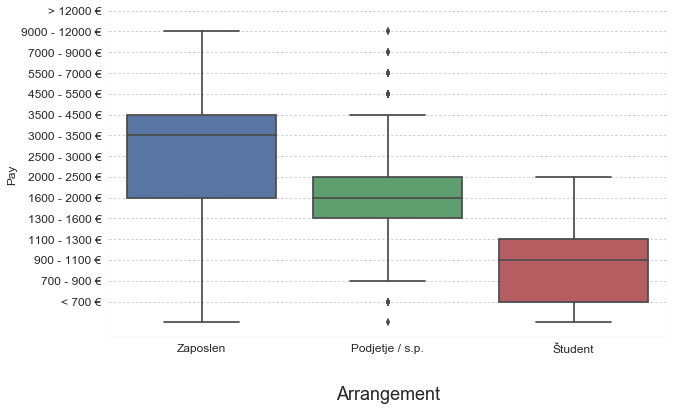

In [21]:
sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

leg=['Zaposlen','Podjetje / s.p.','Študent']

plt.figure(figsize=(10,6))

plt.grid(b=True, which='major', linestyle=':')

ax = sns.boxplot(x="Arrangement_r", y="Pay_F", data=IT_data)

ax.set_yticks(np.arange(1,16))
ax.set_yticklabels(znesek)

leg1 = [ '\n'.join(wrap(l, 15)) for l in leg ]

ax.set_xticklabels(leg, fontsize=12)
ax.set_xlabel('Arrangement', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('Pay', fontsize=12)
    
print("Total N =", IT_data['Arrangement_r'].value_counts().sum())

In [22]:
IT_data['Duration_F'] = IT_data['Duration'].apply(lambda x: {'Sem svež in komaj začenjam' : 0, '1 leto' : 1, '1 - 3 leta' : 2, '3 - 6 let' : 3, 
                                                             '6 - 10 let' : 4, '10 - 15 let' : 5, '15 - 25 let' : 6, '25 - 35 let' : 7,
                                                             'Več kot 35 let' : 8}[x])

trajanje = ('Sem svež in komaj začenjam', '1 leto', '1 - 3 leta', '3 - 6 let', '6 - 10 let', '10 - 15 let', '15 - 25 let', 
            '25 - 35 let', 'Več kot 35 let')

Total N = 879


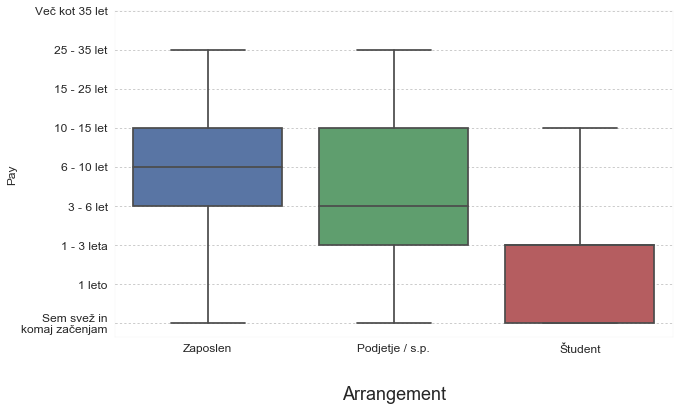

In [23]:
sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

leg=['Zaposlen','Podjetje / s.p.','Študent','Drugo']

plt.figure(figsize=(10,6))

plt.grid(b=True, which='major', linestyle=':')

ax = sns.boxplot(x="Arrangement_r", y="Duration_F", data=IT_data)

trajanje1 = [ '\n'.join(wrap(l, 15)) for l in trajanje ]

ax.set_yticks(np.arange(0,9))
ax.set_yticklabels(trajanje1)

leg1 = [ '\n'.join(wrap(l, 15)) for l in leg ]

ax.set_xticklabels(leg, fontsize=12)
ax.set_xlabel('Arrangement', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('Pay', fontsize=12)
    
print("Total N =", IT_data['Arrangement_r'].value_counts().sum())

Total N = 889


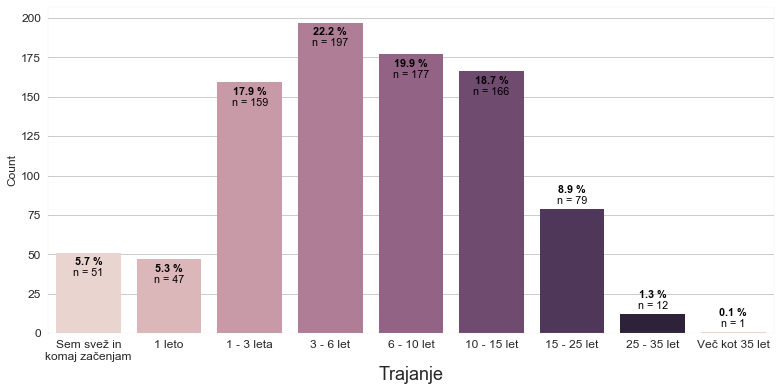

In [24]:
plt.figure(figsize=(13,6))

sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

trajanje = ['Sem svež in komaj začenjam', '1 leto', '1 - 3 leta', '3 - 6 let', '6 - 10 let', '10 - 15 let',
          '15 - 25 let', '25 - 35 let', 'Več kot 35 let']

ncount = len(IT_data[IT_data['Duration'].isnull() == False])

ax = sns.countplot(x="Duration", data=IT_data, order=trajanje, palette=sns.cubehelix_palette(8))

sns.set(font_scale=0.9)

for p in ax.patches[0:6]:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]

    ax.annotate('{:.1f} %'.format(100.*y/ncount), (x.mean(), y-9), ha='center', va='bottom', color='black', weight='bold')
    ax.annotate('n = {:.0f}'.format(y), (x.mean(), y-16), ha='center', va='bottom', color='black')

for p in ax.patches[6:]:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]

    ax.annotate('{:.1f} %'.format(100.*y/ncount), (x.mean(), y+9), ha='center', va='bottom', color='black', weight='bold')
    ax.annotate('n = {:.0f}'.format(y), (x.mean(), y+2), ha='center', va='bottom', color='black')

trajanje1 = [ '\n'.join(wrap(l, 15)) for l in trajanje ]
       
ax.set_xticklabels(trajanje1, fontsize=12)
ax.set_xlabel('Trajanje', fontsize=18)
ax.set_ylabel('Count', fontsize=12)
    
print("Total N =", IT_data['Duration'].value_counts().sum())

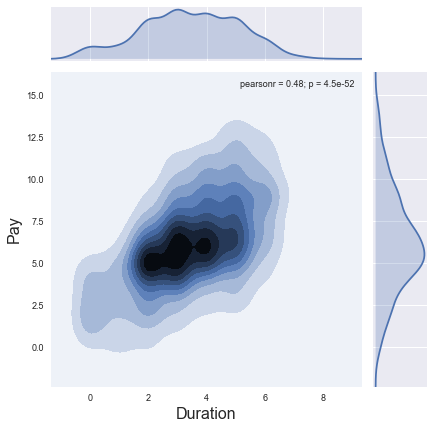

In [25]:
x = sns.jointplot(x=IT_data["Duration_F"], y=IT_data["Pay_F"], kind='kde')
x.set_axis_labels('Duration', 'Pay', fontsize=16)

In [26]:
# Factorizacija ostalih spremenljivk, ker pr le-teh ni nobenega smislu v vrstnem redu kategorij običajna faktorizacija zadostuje

objvars = ["Employer","Origin_r","Arrangement_r"]

for i in objvars:
    a = i+"_F"
    IT_data[a] = pd.factorize(IT_data[i])[0]

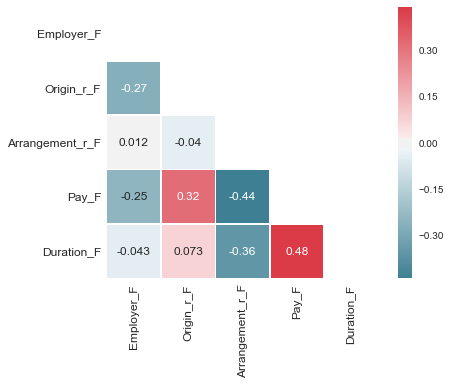

In [27]:
# Now compute the correlation matrix for factorised vars
IT_datac = IT_data[['Employer_F','Origin_r_F','Arrangement_r_F','Pay_F','Duration_F']]

corr = IT_datac.corr()

sns.set(style="white")
sns.set_context("paper", font_scale=1.5)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(font_scale=1)
xx = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, square=True, linewidths=.5, annot=True)